**Аналитическая задача** — провести анализ данных с целью выделения портретов заемщиков по каждой группе целевого признака.

## Загрузка данных

In [ ]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

In [ ]:
# импортируем библиотеку datetime для работы с датами
import datetime
from datetime import datetime, date

In [ ]:
# импортируем библиотеку matplotlib и seaborn для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('tableau-colorblind10')
pd.options.display.float_format ='{:.2f}'.format
from sklearn.preprocessing import LabelEncoder

In [ ]:
#подключение методов для проверки гипотез о виде закона распределения,
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import ks_2samp
from scipy.stats import anderson
from scipy.stats import jarque_bera

#тесты для проверки гипотезы о равенстве параметров распределений
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal


In [ ]:
# загружаем данные
df = pd.read_csv('/content/dataset_segment_bank.csv')

In [ ]:
# посмотрим на загруженные данные
df.head(3)

,Идентификатор,Дата рождения,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,География телефона,Сумма перевода,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Оператор связи,Пол
0,1493553,1981-05-08,BAD,17.00,2.00,77.00,77.00,371600.00,265000.00,21858.82,371600.00,Стойка,NaN,Ж
1,8130758,1979-03-06,BAD,4.00,2.00,77.00,77.00,137574.00,135000.00,34393.50,137574.00,Стойка,NaN,М
2,1782539,1957-04-29,BAD,3.00,2.00,77.00,77.00,175150.00,135000.00,58383.33,175150.00,Стойка,МегаФон,М


In [ ]:
# смотрим форму датафрема
df.shape

(50224, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50224 entries, 0 to 50223
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Идентификатор                                 50224 non-null  int64  
 1   Дата рождения                                 50224 non-null  object 
 2   Дисциплина клиентов без просрочки по кредиту  50223 non-null  object 
 3   Количество переводов                          50158 non-null  float64
 4   Тип переводов                                 50191 non-null  float64
 5   География переводов                           50191 non-null  float64
 6   География телефона                            48324 non-null  float64
 7   Сумма перевода                                50158 non-null  float64
 8   Максимальная сумма перевода                   50158 non-null  float64
 9   Средняя сумма перевода                        50158 non-null 

In [ ]:
# подcчитаем кол-во пропусков в каждом столбце
df.isnull().sum()

Идентификатор                                      0
Дата рождения                                      0
Дисциплина клиентов без просрочки по кредиту       1
Количество переводов                              66
Тип переводов                                     33
География переводов                               33
География телефона                              1900
Сумма перевода                                    66
Максимальная сумма перевода                       66
Средняя сумма перевода                            66
Полная сумма перевода                             66
Канал, через который пришел клиент                31
Оператор связи                                   645
Пол                                                9
dtype: int64

In [ ]:
# вычисляем общее кол-во пропусков в датафрейме
df.isnull().sum().sum()

2982

In [ ]:
# определим процент пропущенных значений в столбце "География телефона"
(df.isnull().sum().sum()/len(df))*100

5.937400446001911

Видим, что датасет состоит из 50224 строк (наблюдений) и 14 столбцов (переменных).
В выгруженных данных имеются пропущенные значения, которые составляют 6% от общего набора данных.

## Предварительная подготовка данных

### Корректировка заголовков

In [ ]:
#приведение заголовков к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['идентификатор', 'дата рождения',
       'дисциплина клиентов без просрочки по кредиту', 'количество переводов',
       'тип переводов', 'география переводов', 'география телефона',
       'сумма перевода', 'максимальная сумма перевода',
       'средняя сумма перевода', 'полная сумма перевода',
       'канал, через который пришел клиент', 'оператор связи', 'пол'],
      dtype='object')

In [ ]:
# изменение (сокращение/замена пробела) заголовков
df.rename(columns={'дата рождения': 'дата_рождения',
                   'дисциплина клиентов без просрочки по кредиту': 'дисциплина_клиентов',
                   'количество переводов': 'количество_переводов',
                   'тип переводов': 'тип_переводов',
                   'география переводов': 'география_переводов',
                   'география телефона': 'география_телефона',
                   'сумма перевода': 'сумма_перевода' ,
                   'максимальная сумма перевода': 'максимальная_сумма_перевода',
                   'средняя сумма перевода': 'средняя_сумма_перевода',
                   'полная сумма перевода': 'полная_сумма_перевода',
                   'канал, через который пришел клиент': 'канал_привлечения',
                   'оператор связи': 'оператор_связи'
                  }, inplace = True)
df.head(10)

,идентификатор,дата_рождения,дисциплина_клиентов,количество_переводов,тип_переводов,география_переводов,география_телефона,сумма_перевода,максимальная_сумма_перевода,средняя_сумма_перевода,полная_сумма_перевода,канал_привлечения,оператор_связи,пол
0,1493553,1981-05-08,BAD,17.00,2.00,77.00,77.00,371600.00,265000.00,21858.82,371600.00,Стойка,NaN,Ж
1,8130758,1979-03-06,BAD,4.00,2.00,77.00,77.00,137574.00,135000.00,34393.50,137574.00,Стойка,NaN,М
2,1782539,1957-04-29,BAD,3.00,2.00,77.00,77.00,175150.00,135000.00,58383.33,175150.00,Стойка,МегаФон,М
3,12410720,1977-08-05,BAD,3.00,2.00,77.00,77.00,50250.00,50000.00,16750.00,50250.00,Стойка,NaN,М
4,21309736,1978-08-15,GOOD,5.00,69.00,77.00,77.00,215920.14,135000.00,43184.03,215920.14,Стойка,NaN,М
5,11343857,1983-05-06,BAD,2.00,1.00,77.00,77.00,50150.00,50000.00,25075.00,50150.00,Стойка,NaN,Ж
6,5383517,1972-02-01,BAD,4.00,2.00,77.00,77.00,204150.00,200000.00,51037.50,204150.00,Стойка,NaN,Ж
7,3882794,1979-05-20,BAD,15.00,5.00,77.00,77.00,538300.00,400000.00,35886.67,538300.00,Стойка,NaN,Ж
8,7119607,1969-08-18,BAD,4.00,2.00,77.00,77.00,135335.00,135000.00,33833.75,135335.00,Офис,NaN,Ж
9,7369177,1964-12-17,BAD,9.00,2.00,77.00,77.00,62310.00,38000.00,6923.33,62310.00,Офис,Вымпел-Коммуникации,Ж


### Корректировка типа данных

In [ ]:
# выведем информацию о типе данных
df.dtypes

идентификатор                    int64
дата_рождения                   object
дисциплина_клиентов             object
количество_переводов           float64
тип_переводов                  float64
география_переводов            float64
география_телефона             float64
сумма_перевода                 float64
максимальная_сумма_перевода    float64
средняя_сумма_перевода         float64
полная_сумма_перевода          float64
канал_привлечения               object
оператор_связи                  object
пол                             object
dtype: object

In [ ]:
# преобразуем тип признака "дата_рождения" в дату
df['дата_рождения'] = df['дата_рождения'].astype('datetime64[ns]')
df.dtypes

идентификатор                           int64
дата_рождения                  datetime64[ns]
дисциплина_клиентов                    object
количество_переводов                  float64
тип_переводов                         float64
география_переводов                   float64
география_телефона                    float64
сумма_перевода                        float64
максимальная_сумма_перевода           float64
средняя_сумма_перевода                float64
полная_сумма_перевода                 float64
канал_привлечения                      object
оператор_связи                         object
пол                                    object
dtype: object

### Проверка дублирующихся записей

In [ ]:
print(f"""Количество дублирующихся записей равно {df.drop('идентификатор', axis=1).duplicated().sum()}.
Это составляет {df.drop('идентификатор', axis=1).duplicated().sum()/df.shape[0]:.2%}.""")

Количество дублирующихся записей равно 575.
Это составляет 1.14%.


In [ ]:
# проверим, действительно ли дубли являются дублями
df.loc[df.duplicated()]

,идентификатор,дата_рождения,дисциплина_клиентов,количество_переводов,тип_переводов,география_переводов,география_телефона,сумма_перевода,максимальная_сумма_перевода,средняя_сумма_перевода,полная_сумма_перевода,канал_привлечения,оператор_связи,пол
285,13429088,1984-09-12,MIDDLE,89.00,2.00,77.00,33.00,573174.03,25950.00,6440.16,573174.03,Партнер,Вотек Мобайл,М
334,13429088,1984-09-12,MIDDLE,89.00,2.00,77.00,33.00,573174.03,25950.00,6440.16,573174.03,Партнер,Вотек Мобайл,М
459,17591794,1974-09-28,MIDDLE,22.00,5.00,77.00,NaN,78746.00,10200.00,3579.36,78746.00,Партнер,Мобильные ТелеСистемы,М
466,17591794,1974-09-28,MIDDLE,22.00,5.00,77.00,NaN,78746.00,10200.00,3579.36,78746.00,Партнер,Мобильные ТелеСистемы,М
528,4872767,1968-02-18,BAD,13.00,2.00,77.00,77.00,316064.16,150000.00,24312.63,316064.16,Стойка,NaN,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50149,8551974,1979-12-02,GOOD,471.00,16.00,77.00,23.00,2029892.53,30000.00,4309.75,2029892.53,Партнер,Вымпел-Коммуникации,М
50150,8551974,1979-12-02,GOOD,471.00,16.00,77.00,23.00,2029892.53,30000.00,4309.75,2029892.53,Партнер,Вымпел-Коммуникации,М
50151,8551974,1979-12-02,GOOD,471.00,16.00,77.00,23.00,2029892.53,30000.00,4309.75,2029892.53,Партнер,Вымпел-Коммуникации,М
50152,8551974,1979-12-02,GOOD,471.00,16.00,77.00,23.00,2029892.53,30000.00,4309.75,2029892.53,Партнер,Вымпел-Коммуникации,М


Да, действительно, датасет содержит дублирующиеся значения. Так же можно отметить, что столбец `полная_сумма_перевода` полностью дублирует столбец `сумма_перевода`

In [ ]:
# удалим дублирующиеся записи, оставив только первое значение
df.drop_duplicates(keep='first', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49649 entries, 0 to 50223
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   идентификатор                49649 non-null  int64         
 1   дата_рождения                49649 non-null  datetime64[ns]
 2   дисциплина_клиентов          49648 non-null  object        
 3   количество_переводов         49583 non-null  float64       
 4   тип_переводов                49616 non-null  float64       
 5   география_переводов          49616 non-null  float64       
 6   география_телефона           47781 non-null  float64       
 7   сумма_перевода               49583 non-null  float64       
 8   максимальная_сумма_перевода  49583 non-null  float64       
 9   средняя_сумма_перевода       49583 non-null  float64       
 10  полная_сумма_перевода        49583 non-null  float64       
 11  канал_привлечения            49618 non-nu

In [ ]:
# удаление столбца 'полная_сумма_перевода'
df.drop(columns = ['полная_сумма_перевода'], inplace=True)

### Обработка редких категорий

In [ ]:
# выведем частоты по категориальным признакам
print(df['дисциплина_клиентов'].value_counts(dropna = False))
print('------------')
print(df['тип_переводов'].value_counts(dropna = False))
print('------------')
print(df['география_переводов'].value_counts(dropna = False))
print('------------')
print(df['география_телефона'].value_counts(dropna = False))
print('------------')
print(df['канал_привлечения'].value_counts(dropna = False))
print('------------')
print(df['оператор_связи'].value_counts(dropna = False))
print('------------')
print(df['пол'].value_counts(dropna = False))
print('------------')

GOOD      26852
MIDDLE    13577
BAD        9219
NaN           1
Name: дисциплина_клиентов, dtype: int64
------------
2.00     18673
5.00     13778
69.00     6527
6.00      2542
8.00      1991
1.00      1633
10.00     1549
0.00       739
12.00      468
26.00      289
32.00      253
16.00      248
37.00      220
11.00      194
45.00      157
7.00       139
44.00       62
58.00       45
NaN         33
3.00        30
21.00       14
28.00       14
33.00        7
29.00        6
23.00        5
19.00        5
4.00         5
54.00        3
17.00        3
55.00        3
61.00        2
59.00        2
34.00        2
53.00        2
-1.00        1
30.00        1
67.00        1
43.00        1
9.00         1
49.00        1
Name: тип_переводов, dtype: int64
------------
77.00        19144
78.00         4140
61.00         2338
23.00         2113
66.00         1502
             ...  
498001.00        2
14.00            2
6.00             1
20.00            1
19.00            1
Name: география_переводов, 

1. "тип_переводов" - все категории, содержащие менее 20 наблюдений, объединим в новую категорию `99`;
2. "география_переводов", "география_телефона" - регионы, содержащие менее 20 наблюдений, объединим в новую категорию `0.0`;
3. "оператор_связи" - переименуем категорию `МобильныеТелеСистемы` в `Мобильные ТелеСистемы`, `Ниж-ская сот.связь` в `Нижегородская сотовая связь`  (ошибка при внесении данных) и категории, содержащие менее 20 наблюдений и категорию 0.0 (вероятнее всего ошибочно заполненные данные), объединим в новую категорию `0.0`.

In [ ]:
# создадим список категорий на объединение
df['тип_переводов'].unique()

array([ 2., 69.,  1.,  5.,  8., 32.,  0., 10., 26., 12.,  6., 45., 11.,
       33., 16.,  7., 37., 21., 58., 19., 59., 44., 53., 28., 34.,  3.,
       43., 29., 67., 17., 30., -1., 23., 55.,  4., 61.,  9., 54., nan,
       49.])

In [ ]:
lst = [21.0, 28.0, 33.0, 29.0, 4.0, 23.0, 19.0, 17.0, 55.0, 54.0, 34.0, \
       53.0, 59.0, 61.0, 43.0, 67.0, 30.0, -1.0, 9.0]
df.loc[df['тип_переводов'].isin(lst), 'тип_переводов'] = 99

# смотрим частоты
df['тип_переводов'].value_counts(dropna = False)

2.00     18673
5.00     13778
69.00     6527
6.00      2542
8.00      1991
1.00      1633
10.00     1549
0.00       739
12.00      468
26.00      289
32.00      253
16.00      248
37.00      220
11.00      194
45.00      157
7.00       139
99.00       78
44.00       62
58.00       45
NaN         33
3.00        30
49.00        1
Name: тип_переводов, dtype: int64

In [ ]:
# проверим количество уникальных значений
df['география_переводов'].nunique()

74

In [ ]:
# увеличим максимальное количество отображаемых строк
pd.options.display.max_rows = 74

In [ ]:
# смотрим частоты
df['география_переводов'].value_counts(dropna = False)

77.00        19144
78.00         4140
61.00         2338
23.00         2113
66.00         1502
             ...  
498001.00        2
14.00            2
6.00             1
20.00            1
19.00            1
Name: география_переводов, Length: 75, dtype: int64

In [ ]:
# создадим список категорий на объединение
lst1 = [24.0, 46.0, 45.0, 1.0, 7.0, 89.0, 5.0, 29.0, 15.0, 9.0, 8.0, \
        25.0, 11.0, 32.0, 65.0, 38.0, 67.0, 22.0, 57.0, 498002.0, 14.0, \
        75.0, 498001.0, 6.0, 20.0, 19.0, 0.0]
df.loc[df['география_переводов'].isin(lst1), 'география_переводов'] = 0.0

In [ ]:
# смотрим частоты
df['география_переводов'].value_counts(dropna = False)

77.00    19144
78.00     4140
61.00     2338
23.00     2113
66.00     1502
2.00      1298
63.00     1246
62.00     1202
40.00     1105
26.00     1102
64.00      994
74.00      980
47.00      908
10.00      764
56.00      759
34.00      744
52.00      707
71.00      704
59.00      647
16.00      627
42.00      565
73.00      523
36.00      382
54.00      370
0.00       338
39.00      336
13.00      310
43.00      282
37.00      261
58.00      259
55.00      254
18.00      253
69.00      237
35.00      220
76.00      219
33.00      211
53.00      198
48.00      192
44.00      188
72.00      180
51.00      174
30.00      150
68.00      115
31.00       98
21.00       93
60.00       93
12.00       66
NaN         33
86.00       25
Name: география_переводов, dtype: int64

In [ ]:
# проверим количество уникальных значений
df['география_телефона'].nunique()

64

In [ ]:
# смотрим частоты
df['география_телефона'].value_counts(dropna = False)

77.00    13610
78.00     5468
23.00     2457
61.00     2266
NaN       1868
66.00     1638
2.00      1511
63.00     1410
26.00     1241
74.00     1166
64.00     1135
40.00     1099
62.00     1060
34.00      954
71.00      848
52.00      844
56.00      831
16.00      810
10.00      797
59.00      750
42.00      690
73.00      639
36.00      521
54.00      444
39.00      381
13.00      349
43.00      327
37.00      320
55.00      319
18.00      306
58.00      300
69.00      296
48.00      266
76.00      256
33.00      255
72.00      253
35.00      246
53.00      231
44.00      226
30.00      211
51.00      185
60.00      179
68.00      156
20.00      137
31.00      112
12.00       82
1.00        40
46.00       20
7.00        19
45.00       18
32.00       18
5.00        17
15.00       15
9.00        12
8.00        10
57.00        7
67.00        6
70.00        4
24.00        4
29.00        3
0.00         2
25.00        1
38.00        1
75.00        1
14.00        1
Name: география_телефона,

In [ ]:
# создадим список категорий на объединение
lst2 = [32.0, 5.0, 45.0, 15.0, 15.0, 0.0, 47.0, 9.0, 8.0, 57.0, 67.0, \
        70.0, 24.0, 29.0, 21.0, 25.0, 38.0, 75.0, 14.0]
df.loc[df['география_телефона'].isin(lst2), 'география_телефона'] = 0.0

In [ ]:
# смотрим частоты
df['география_телефона'].value_counts(dropna = False)

77.00    13610
78.00     5468
23.00     2457
61.00     2266
NaN       1868
66.00     1638
2.00      1511
63.00     1410
26.00     1241
74.00     1166
64.00     1135
40.00     1099
62.00     1060
34.00      954
71.00      848
52.00      844
56.00      831
16.00      810
10.00      797
59.00      750
42.00      690
73.00      639
36.00      521
54.00      444
39.00      381
13.00      349
43.00      327
37.00      320
55.00      319
18.00      306
58.00      300
69.00      296
48.00      266
76.00      256
33.00      255
72.00      253
35.00      246
53.00      231
44.00      226
30.00      211
51.00      185
60.00      179
68.00      156
20.00      137
0.00       120
31.00      112
12.00       82
1.00        40
46.00       20
7.00        19
Name: география_телефона, dtype: int64

In [ ]:
# смотрим частоты
df['оператор_связи'].value_counts(dropna = False)

МегаФон                                               14221
Вымпел-Коммуникации                                   13463
Мобильные ТелеСистемы                                 12251
МобильныеТелеСистемы                                   1805
Санкт-Петербург Телеком                                1143
Ростовская Сотовая Связь                               1120
Вотек Мобайл                                            922
NaN                                                     644
ЕКАТЕРИНБУРГ-2000                                       601
Ростелеком                                              595
Челябинская Сотовая Связь                               534
Нижегородская сотовая связь                             455
Кемеровская Мобильная Связь                             361
Смоленская Сотовая Связь                                246
Сибирская Сотовая Связь                                 187
Персональные Системы Связи в Регионе                    167
Волгоград-GSM                           

In [ ]:
# запишим уникальные значения опретор_связи в отдельную переменную
operators = df['оператор_связи'].unique()

In [ ]:
# создадим серию, у которой в качестве значений и индексных меток будут выступать
# уникальные значения признака 'оператор_связи', записанные в "operators"
operators = pd.Series(data = operators, index = operators, name = 'operators')
operators.head(3)

NaN                                    NaN
МегаФон                            МегаФон
Вымпел-Коммуникации    Вымпел-Коммуникации
Name: operators, dtype: object

In [ ]:
operators['МобильныеТелеСистемы'] = 'Мобильные ТелеСистемы'
operators['Ниж-ская сот.связь'] = 'Нижегородская сотовая связь'

# заменим исходные категории 'оператор_связи' на новые, с помощью серии
df['оператор_связи'] = df['оператор_связи'].map(operators)

In [ ]:
# создадим список категорий на объединение и объединим категории
lst3 = ['Оренбург-GSM', 'Астрахань GSM', 'Ярославль-GSM', \
        'Курская Сотовая Связь', 'Енисейтелеком', 'Астарта', 'Байкалвестком', \
        'Сот.св.Башкортостана', 'Кодотел', 'Парма Мобайл', \
        'Финансовая компания ИМПЕРАТИВ', 'Новая телефонная компания', \
        'Беспровод. инф. технологи', 'Адыгейская сотовая связь', \
        'Архангельские Мобильные Сети', 'СИБИНТЕРТЕЛЕКОМ', 'Скай Линк']
df.loc[df['оператор_связи'].isin(lst3), 'оператор_связи'] = 'прочее'
df['оператор_связи'].value_counts(dropna = False)

МегаФон                                               14221
Мобильные ТелеСистемы                                 14056
Вымпел-Коммуникации                                   13463
Санкт-Петербург Телеком                                1143
Ростовская Сотовая Связь                               1120
Вотек Мобайл                                            922
NaN                                                     644
ЕКАТЕРИНБУРГ-2000                                       601
Ростелеком                                              595
Челябинская Сотовая Связь                               534
Нижегородская сотовая связь                             476
Кемеровская Мобильная Связь                             361
Смоленская Сотовая Связь                                246
Сибирская Сотовая Связь                                 187
Персональные Системы Связи в Регионе                    167
Волгоград-GSM                                           142
Телеком Евразия                         

In [ ]:
df.head()

,идентификатор,дата_рождения,дисциплина_клиентов,количество_переводов,тип_переводов,география_переводов,география_телефона,сумма_перевода,максимальная_сумма_перевода,средняя_сумма_перевода,канал_привлечения,оператор_связи,пол
0,1493553,1981-05-08,BAD,17.00,2.00,77.00,77.00,371600.00,265000.00,21858.82,Стойка,NaN,Ж
1,8130758,1979-03-06,BAD,4.00,2.00,77.00,77.00,137574.00,135000.00,34393.50,Стойка,NaN,М
2,1782539,1957-04-29,BAD,3.00,2.00,77.00,77.00,175150.00,135000.00,58383.33,Стойка,МегаФон,М
3,12410720,1977-08-05,BAD,3.00,2.00,77.00,77.00,50250.00,50000.00,16750.00,Стойка,NaN,М
4,21309736,1978-08-15,GOOD,5.00,69.00,77.00,77.00,215920.14,135000.00,43184.03,Стойка,NaN,М


In [ ]:
#для поиска аномалий разделим датафрем на непрерывные и дискретные признаки
df.columns

Index(['идентификатор', 'дата_рождения', 'дисциплина_клиентов',
       'количество_переводов', 'тип_переводов', 'география_переводов',
       'география_телефона', 'сумма_перевода', 'максимальная_сумма_перевода',
       'средняя_сумма_перевода', 'канал_привлечения', 'оператор_связи', 'пол'],
      dtype='object')

In [ ]:
cont = ['количество_переводов', 'сумма_перевода',
            'максимальная_сумма_перевода',
            'средняя_сумма_перевода'] #количественные (непрерывные)
disct = ['география_переводов',
          'география_телефона','дисциплина_клиентов','канал_привлечения',
          'пол', 'оператор_связи', 'пол', 'тип_переводов'] #категориальные (дискретные)

In [ ]:
for col in disct:
    print(f'---- начало признака {col} ----')
    print(df[col].value_counts())
    print(f'---- конец признака {col} ----')
    print()

---- начало признака география_переводов ----
77.00    19144
78.00     4140
61.00     2338
23.00     2113
66.00     1502
2.00      1298
63.00     1246
62.00     1202
40.00     1105
26.00     1102
64.00      994
74.00      980
47.00      908
10.00      764
56.00      759
34.00      744
52.00      707
71.00      704
59.00      647
16.00      627
42.00      565
73.00      523
36.00      382
54.00      370
0.00       338
39.00      336
13.00      310
43.00      282
37.00      261
58.00      259
55.00      254
18.00      253
69.00      237
35.00      220
76.00      219
33.00      211
53.00      198
48.00      192
44.00      188
72.00      180
51.00      174
30.00      150
68.00      115
31.00       98
21.00       93
60.00       93
12.00       66
86.00       25
Name: география_переводов, dtype: int64
---- конец признака география_переводов ----

---- начало признака география_телефона ----
77.00    13610
78.00     5468
23.00     2457
61.00     2266
66.00     1638
2.00      1511
63.00     141

In [ ]:
# исследуем аномальные значения непрерывных признаков
# 2 линии нижнего и верхнего усов
# для подсчета значений нижнего и верхнего усов была предложена следующая функция

def calc_boxplot(df_col : pd.Series) -> tuple:

    """
    Функция для расчета значений нижнего и верхнего усов.
    На вход подается столбец датафрейма,
    на выходе кортеж: первый элемент -- нижний ус, второй элемент -- верхний ус
    """

    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

In [ ]:
dict_anomals = {'количество_переводов': 'количество_переводов',
                'сумма_перевода' : 'сумма_перевода',
                'максимальная_сумма_перевода': 'максимальная_сумма_перевода',
                'средняя_сумма_перевода': 'средняя_сумма_перевода'} # создадим словарь для подписи графиков

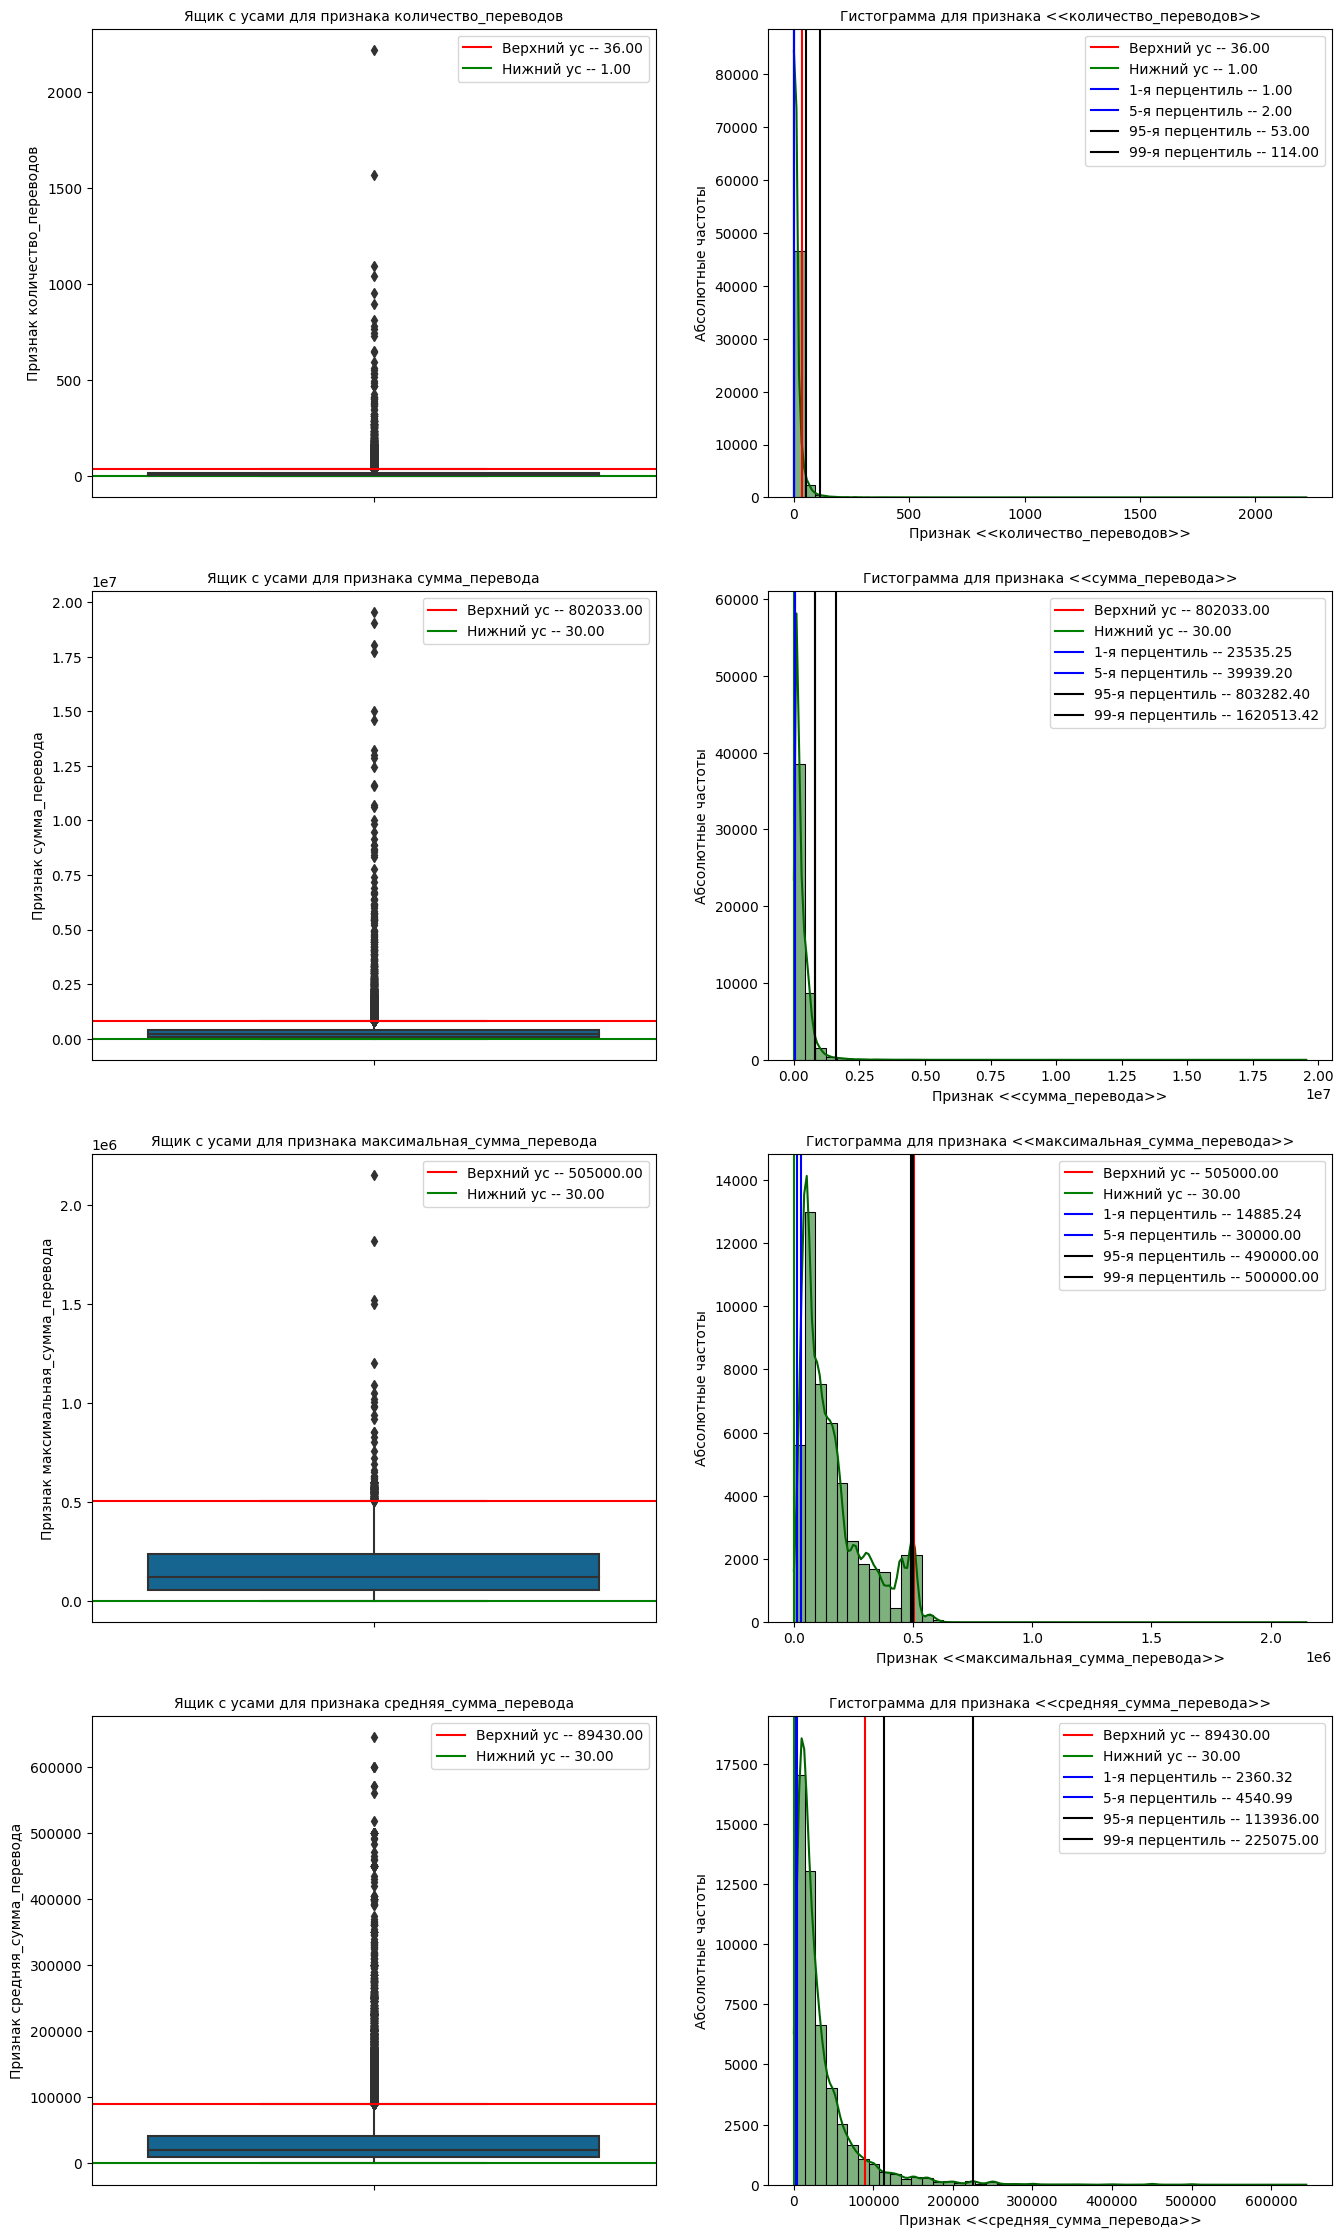

In [ ]:
# поиск аномальных значений
# выводим графики для количественных признаков
plt.subplots(nrows=len(cont),
             ncols=2,
             #sharey=True,
             figsize=(16,28))

for index, col in enumerate(cont, start=0):
    plt.subplot(len(cont),2,2*index+1)
    sns.boxplot(data=df,
            y=col)
    actual_loval, actual_hival = calc_boxplot(df[col])
    plt.axhline(actual_hival,
            color='red',
            label=f'Верхний ус -- {actual_hival:.2f}')
    plt.axhline(actual_loval,
            color='green',
            label=f'Нижний ус -- {actual_loval:.2f}')
    plt.title(f"Ящик с усами для признака {col}", fontsize=10)
    plt.ylabel(f'Признак {col}', fontsize=10)
    plt.legend()
    plt.subplot(len(cont),2,2*index+2)
    sns.histplot(data=df,
             x=col,
             color='darkgreen',
             bins=48,
             kde=True)
    plt.title(f'Гистограмма для признака <<{col}>>', fontsize=10)
    plt.xlabel(f'Признак <<{col}>>', fontsize=10)
    plt.ylabel('Абсолютные частоты', fontsize=10)
    plt.axvline(actual_hival,
                color='red',
                label=f'Верхний ус -- {actual_hival:.2f}')
    plt.axvline(actual_loval,
                color='green',
                label=f'Нижний ус -- {actual_loval:.2f}')
    per_1 = np.nanpercentile(df[col], 1)
    per_5 = np.nanpercentile(df[col], 5)
    per_95 = np.nanpercentile(df[col], 95)
    per_99 = np.nanpercentile(df[col], 99)
    plt.axvline(per_1,
                color='blue',
                label=f'1-я перцентиль -- {per_1:.2f}')
    plt.axvline(per_5,
                color='blue',
                label=f'5-я перцентиль -- {per_5:.2f}')
    plt.axvline(per_95,
                color='black',
                label=f'95-я перцентиль -- {per_95:.2f}')
    plt.axvline(per_99,
                color='black',
                label=f'99-я перцентиль -- {per_99:.2f}')
    plt.legend()

In [ ]:
# отфильтруем признаки по 1 и 99 перцентилю и запишем их в отдельный датафрейм:
filtr_количество_переводов = df.количество_переводов.between(np.nanpercentile
 (df['количество_переводов'],1),np.nanpercentile(df['количество_переводов'],99))

In [ ]:
filtr_сумма_перевода = df.сумма_перевода.between(np.nanpercentile
 (df['сумма_перевода'],1),np.nanpercentile(df['сумма_перевода'],99))

In [ ]:
filtr_максимальная_сумма_перевода = df.максимальная_сумма_перевода.between(np.nanpercentile
 (df['максимальная_сумма_перевода'],1),np.nanpercentile(df['максимальная_сумма_перевода'],99))

In [ ]:
filtr_средняя_сумма_перевода = df.средняя_сумма_перевода.between(np.nanpercentile
 (df['средняя_сумма_перевода'],1),np.nanpercentile(df['средняя_сумма_перевода'],99))

In [ ]:
#фильтруем датасет
df_abnormal = df.loc[filtr_количество_переводов
            & filtr_сумма_перевода
            & filtr_максимальная_сумма_перевода
            & filtr_средняя_сумма_перевода
                     ]
df_abnormal

,идентификатор,дата_рождения,дисциплина_клиентов,количество_переводов,тип_переводов,география_переводов,география_телефона,сумма_перевода,максимальная_сумма_перевода,средняя_сумма_перевода,канал_привлечения,оператор_связи,пол
0,1493553,1981-05-08,BAD,17.00,2.00,77.00,77.00,371600.00,265000.00,21858.82,Стойка,NaN,Ж
1,8130758,1979-03-06,BAD,4.00,2.00,77.00,77.00,137574.00,135000.00,34393.50,Стойка,NaN,М
2,1782539,1957-04-29,BAD,3.00,2.00,77.00,77.00,175150.00,135000.00,58383.33,Стойка,МегаФон,М
3,12410720,1977-08-05,BAD,3.00,2.00,77.00,77.00,50250.00,50000.00,16750.00,Стойка,NaN,М
4,21309736,1978-08-15,GOOD,5.00,69.00,77.00,77.00,215920.14,135000.00,43184.03,Стойка,NaN,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49759,3653998,1982-12-08,MIDDLE,112.00,16.00,77.00,77.00,761065.34,384000.00,6795.23,Офис,МегаФон,Ж
49762,7375286,1955-09-07,MIDDLE,111.00,0.00,77.00,78.00,334021.00,50000.00,3009.20,Офис,Мобильные ТелеСистемы,Ж
49772,23846951,1965-03-18,GOOD,114.00,2.00,77.00,77.00,741352.48,93000.00,6503.09,Офис,МегаФон,Ж
49773,23674209,1973-01-23,GOOD,114.00,0.00,77.00,77.00,1031800.00,195000.00,9050.88,Офис,МегаФон,М


In [ ]:
#проверим % потерь от фильтрации данных
(1 - df.loc[filtr_количество_переводов
            & filtr_сумма_перевода
            & filtr_максимальная_сумма_перевода
            & filtr_средняя_сумма_перевода].shape[0] / df.shape[0])*100

5.033334004713086

In [ ]:
# Видим, что процент потерь на данном этапе составил 4,9%, что допустимо.

In [ ]:
# выделим аномалии в отдельный датафрейм для анализа
# фильтруем датасет
df_anomalies = df.loc[~(filtr_количество_переводов
            & filtr_сумма_перевода
            & filtr_максимальная_сумма_перевода
            & filtr_средняя_сумма_перевода)]
df_anomalies

,идентификатор,дата_рождения,дисциплина_клиентов,количество_переводов,тип_переводов,география_переводов,география_телефона,сумма_перевода,максимальная_сумма_перевода,средняя_сумма_перевода,канал_привлечения,оператор_связи,пол
43,13636683,1981-11-17,BAD,5.00,69.00,77.00,77.00,15250.00,10000.00,3050.00,Офис,Мобильные ТелеСистемы,М
54,13888514,1971-02-27,BAD,1.00,2.00,77.00,71.00,300000.00,300000.00,300000.00,Стойка,Вотек Мобайл,М
55,12410041,1957-08-08,BAD,10.00,2.00,77.00,77.00,38800.00,12200.00,3880.00,Офис,NaN,М
101,12037779,1962-03-03,MIDDLE,5.00,2.00,0.00,77.00,23650.00,7000.00,4730.00,Офис,NaN,М
132,3507882,1964-04-16,BAD,2.00,2.00,74.00,74.00,450500.00,450000.00,225250.00,Партнер,NaN,Ж
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50219,5593823,1962-12-08,MIDDLE,NaN,2.00,0.00,NaN,NaN,NaN,NaN,Партнер,МегаФон,Ж
50220,11667343,1958-10-26,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Партнер,Вымпел-Коммуникации,М
50221,5947389,1977-10-28,BAD,NaN,2.00,77.00,77.00,NaN,NaN,NaN,Офис,Мобильные ТелеСистемы,Ж
50222,8937816,1982-10-09,BAD,NaN,44.00,77.00,77.00,NaN,NaN,NaN,Офис,NaN,М


### Работа с пропущенными значениями

In [ ]:
# подcчитаем кол-во пропусков в каждом столбце
df_abnormal.isnull().sum()

идентификатор                     0
дата_рождения                     0
дисциплина_клиентов               1
количество_переводов              0
тип_переводов                     0
география_переводов               0
география_телефона             1658
сумма_перевода                    0
максимальная_сумма_перевода       0
средняя_сумма_перевода            0
канал_привлечения                24
оператор_связи                  617
пол                               7
dtype: int64

Видим, что пропуски есть не только в количественных, но и в категориальных признаках.
По количественным признакам "количество_переводов", "сумма_перевода", "максимальная_сумма_перевода", "средняя_сумма_перевода", "полная_сумма_перевода" - видим одинаковое количество пропусков, что свидетельствет об отсутсвии информации в одной строке по нескольким признакам - будем удалять данные строки.

In [ ]:
df_abnormal = df_abnormal.dropna(subset=["количество_переводов",
                       "сумма_перевода",
                       "максимальная_сумма_перевода",
                       "средняя_сумма_перевода"])
df_abnormal.isnull().sum()

идентификатор                     0
дата_рождения                     0
дисциплина_клиентов               1
количество_переводов              0
тип_переводов                     0
география_переводов               0
география_телефона             1658
сумма_перевода                    0
максимальная_сумма_перевода       0
средняя_сумма_перевода            0
канал_привлечения                24
оператор_связи                  617
пол                               7
dtype: int64

Видим, что после удаления пропусков, по количественным признакам, у нас остались пропуски только по категориальным признакам. Заменим их на наиболее часто встречающееся значение - моду.

In [ ]:
df_abnormal.дисциплина_клиентов.mode()

0    GOOD
Name: дисциплина_клиентов, dtype: object

In [ ]:
df_abnormal['дисциплина_клиентов'] = df_abnormal['дисциплина_клиентов'].fillna('GOOD')

In [ ]:
# пропущенные значения "география_телефонов" заменим на
# значения из столбца "география_переводов"
df_abnormal.loc[df_abnormal.география_телефона.isna(), 'география_телефона'] = df_abnormal.география_переводов

In [ ]:
df_abnormal.канал_привлечения.mode()

0    Офис
Name: канал_привлечения, dtype: object

In [ ]:
df_abnormal['канал_привлечения'] = df_abnormal['канал_привлечения'].fillna('Офис')

In [ ]:
df_abnormal.оператор_связи.mode()

0    МегаФон
Name: оператор_связи, dtype: object

In [ ]:
df_abnormal['оператор_связи'] = df_abnormal['оператор_связи'].fillna('МегаФон')

In [ ]:
df_abnormal.isnull().sum()

идентификатор                  0
дата_рождения                  0
дисциплина_клиентов            0
количество_переводов           0
тип_переводов                  0
география_переводов            0
география_телефона             0
сумма_перевода                 0
максимальная_сумма_перевода    0
средняя_сумма_перевода         0
канал_привлечения              0
оператор_связи                 0
пол                            7
dtype: int64

In [ ]:
# записи с неизвестными значениями "пол" удалим
df_abnormal = df_abnormal.dropna(subset=["пол"])
df_abnormal.isnull().sum()

идентификатор                  0
дата_рождения                  0
дисциплина_клиентов            0
количество_переводов           0
тип_переводов                  0
география_переводов            0
география_телефона             0
сумма_перевода                 0
максимальная_сумма_перевода    0
средняя_сумма_перевода         0
канал_привлечения              0
оператор_связи                 0
пол                            0
dtype: int64

### Добавление нового признака

In [ ]:
#добавляем в датафрейм вычисляемый столбец 'возраст'

df_abnormal['дата_рождения'] = pd.to_datetime(df_abnormal['дата_рождения'], errors = 'coerce')
df_abnormal['возраст'] = (pd.to_datetime('today') - df_abnormal['дата_рождения']).astype('<m8[Y]')

In [ ]:
# преобразуем тип данных признака "возраст" в 'int64'
df_abnormal['возраст'] = df_abnormal['возраст'].astype('int64')
df_abnormal.dtypes

идентификатор                           int64
дата_рождения                  datetime64[ns]
дисциплина_клиентов                    object
количество_переводов                  float64
тип_переводов                         float64
география_переводов                   float64
география_телефона                    float64
сумма_перевода                        float64
максимальная_сумма_перевода           float64
средняя_сумма_перевода                float64
канал_привлечения                      object
оператор_связи                         object
пол                                    object
возраст                                 int64
dtype: object

## Исследовательский анализ данных

#### Категориальные признаки

In [ ]:
# посмотрим на описательные статистики
# добавим квартили (0.01, 0.05 и 0.95, 0.99)
per = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
df_abnormal[cont].describe(percentiles=per).round(2)

,количество_переводов,сумма_перевода,максимальная_сумма_перевода,средняя_сумма_перевода
count,47143.00,47143.00,47143.00,47143.00
mean,13.77,259697.61,163244.99,32456.14
std,15.59,233319.45,132368.37,34042.56
min,1.00,23550.00,14900.00,2360.68
1%,1.00,30100.00,25971.00,3297.83
5%,2.00,43715.10,30000.00,5003.45
25%,4.00,92377.50,55000.00,10623.90
50%,9.00,182530.00,120000.00,20115.78
75%,17.00,358271.50,215000.00,41015.93
95%,46.00,712537.00,450000.00,101809.10


In [ ]:
# посчитаем выборочные статистики в разрезе значений целевого признака
# (Дисциплина клиентов без просрочки по кредиту)
df_abnormal.groupby('дисциплина_клиентов')[cont].agg(['mean', 'median']).round(0).reset_index()

дисциплина_клиентов количество_переводов        сумма_перевода            \
                                      mean median           mean    median   
0                 BAD                10.00   6.00      208192.00 137350.00   
1                GOOD                14.00   9.00      274364.00 197275.00   
2              MIDDLE                15.00  10.00      266388.00 186141.00   

  максимальная_сумма_перевода           средняя_сумма_перевода           
                         mean    median                   mean   median  
0                   148216.00 100000.00               34379.00 22723.00  
1                   169372.00 130000.00               33578.00 20854.00  
2                   161556.00 120000.00               28916.00 17668.00

In [ ]:
# перезапишем словарик
cont = ['количество_переводов', 'сумма_перевода',
        'максимальная_сумма_перевода',
        'возраст'] #количественные (непрерывные)
disct = ['география_переводов',
          'география_телефона','дисциплина_клиентов','канал_привлечения',
          'пол', 'оператор_связи', 'пол', 'тип_переводов'] #категориальные (дискретные)

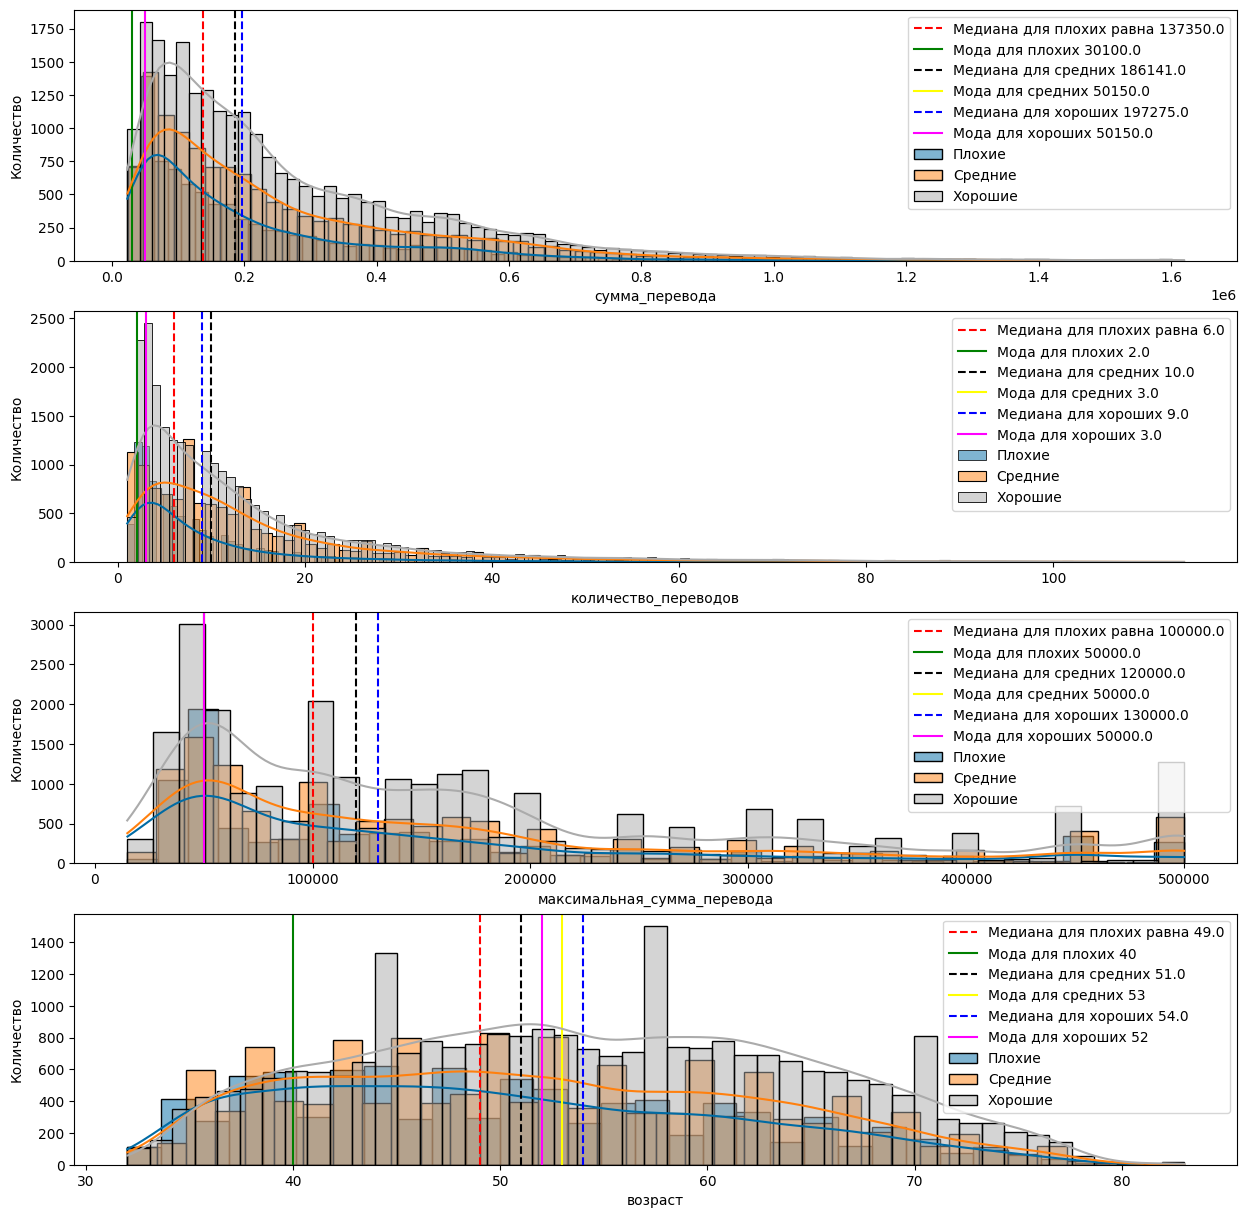

In [ ]:
fig, axes = plt.subplots(4, figsize=(15,15))
i=0
cont = set(cont)
cont.add('возраст')
for i, col in enumerate(cont):
    plt.subplot(4,1,i+1)
    ax = sns.histplot(df_abnormal[df_abnormal['дисциплина_клиентов'] == 'BAD'][col],
             label = 'Плохие', kde=True)
    med = df_abnormal[df_abnormal['дисциплина_клиентов'] == 'BAD'][col].median()
    mod = df_abnormal[df_abnormal['дисциплина_клиентов'] == 'BAD'][col].mode()[0]
    ax.axvline(med,
               color = 'red',
               label = f'Медиана для плохих равна {med}',
               linestyle = '--')
    ax.axvline(mod, color = 'green', label = f'Мода для плохих {mod}')

    ax = sns.histplot(df_abnormal[df_abnormal['дисциплина_клиентов'] == 'MIDDLE'][col]
                      , label = 'Средние', kde=True)
    med = df_abnormal[df_abnormal['дисциплина_клиентов'] == 'MIDDLE'][col].median()
    mod = df_abnormal[df_abnormal['дисциплина_клиентов'] == 'MIDDLE'][col].mode()[0]
    ax.axvline(med, color = 'black', label = f'Медиана для средних {med}',
               linestyle = '--')
    ax.axvline(mod, color = 'yellow', label = f'Мода для средних {mod}')


    ax = sns.histplot(df_abnormal[df_abnormal['дисциплина_клиентов'] == 'GOOD'][col]
                      , label = 'Хорошие', kde=True)
    med = df_abnormal[df_abnormal['дисциплина_клиентов'] == 'GOOD'][col].median()
    mod = df_abnormal[df_abnormal['дисциплина_клиентов'] == 'GOOD'][col].mode()[0]
    ax.axvline(med, color = 'blue', linestyle = '--', label = f'Медиана для хороших {med}')
    ax.axvline(mod, color = 'magenta', label = f'Мода для хороших {mod}')

    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.legend()

In [ ]:
df_abnormal.head(2)

,идентификатор,дата_рождения,дисциплина_клиентов,количество_переводов,тип_переводов,география_переводов,география_телефона,сумма_перевода,максимальная_сумма_перевода,средняя_сумма_перевода,канал_привлечения,оператор_связи,пол,возраст
0,1493553,1981-05-08,BAD,17.00,2.00,77.00,77.00,371600.00,265000.00,21858.82,Стойка,МегаФон,Ж,42
1,8130758,1979-03-06,BAD,4.00,2.00,77.00,77.00,137574.00,135000.00,34393.50,Стойка,МегаФон,М,44


Text(0.5, 1.0, 'Гистограмма для "Тип переводов"')

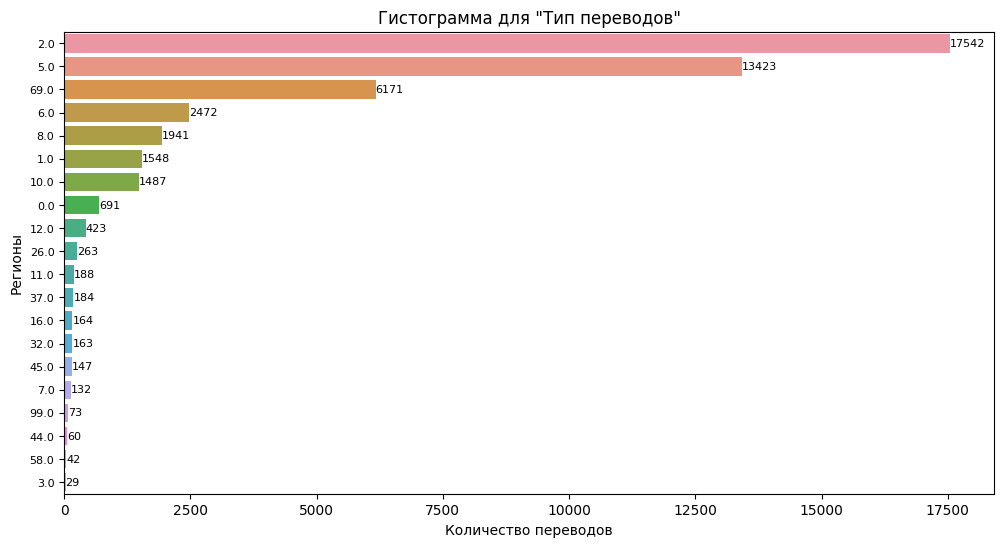

In [ ]:
#анализ аномалий категориальных признаков с помощью графиков

plt.figure(figsize=(12,6))# задаем размер рисунка
ax = sns.countplot(data=df_abnormal,# указываем источник данных
                   y='тип_переводов',
                   order = df_abnormal['тип_переводов'].value_counts().index)

ax.bar_label(ax.containers[0], fontsize=8); #указываем надписи на столбиками + размер шрифта
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8); #указываем подписи для меток по оси Oy + размер шрифта
ax.set_xlabel('Количество переводов')
ax.set_ylabel('Регионы')
ax.set_title('Гистограмма для "Тип переводов"')

<Axes: xlabel='канал_привлечения', ylabel='count'>

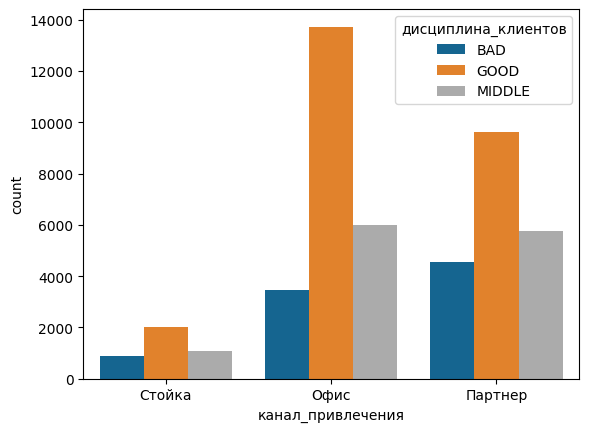

In [ ]:
# посмотрим как распределена дисциплина клиентов по каналам привлечения
sns.countplot(data = df_abnormal,
              x = 'канал_привлечения',
              hue= 'дисциплина_клиентов')

In [ ]:
# зададим словарик для графиков категориальных признаков
cat_1 = ['география_переводов',
         'география_телефона',
         'оператор_связи']
cat_2 = ['дисциплина_клиентов','канал_привлечения',
          'пол']

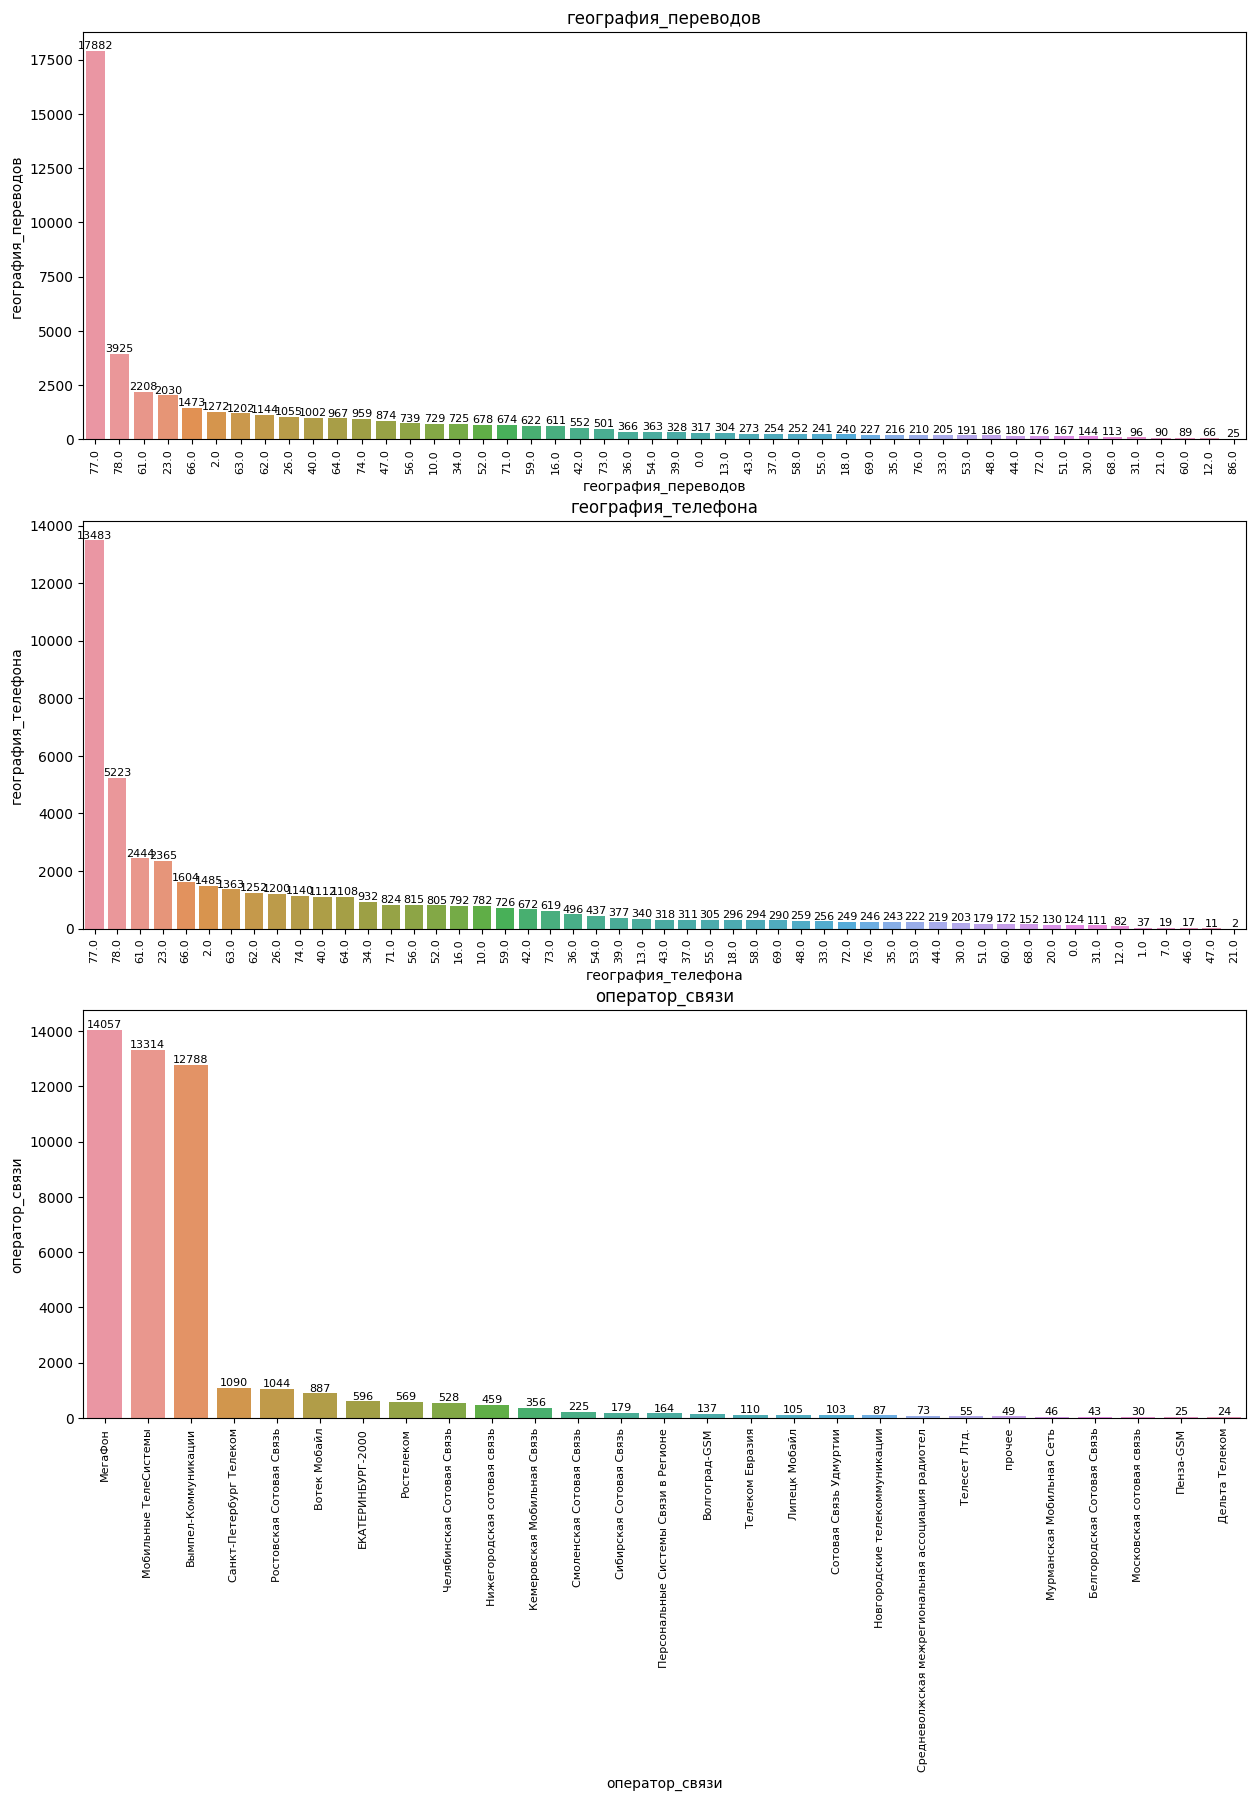

In [ ]:
plt.subplots(len(cat_1),1, figsize=(15,18))  #задаем параметры графика
index = 1
for col in cat_1:
    plt.subplot(len(cat_1),1,index)
    ax=sns.countplot(data=df_abnormal,# указываем источник данных
                   x=col, # указываем необходимый признак
                   #для удобства просмотра его можно построить вдоль оси Oy
                   order = df_abnormal[col].value_counts().index
                   )

    ax.bar_label(ax.containers[0], fontsize=8,); #указываем надписи на столбиками + размер шрифта
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, rotation = 90); #указываем подписи для меток по оси Oy + размер шрифта
    ax.set_xlabel(col)
    ax.set_ylabel(col)
    ax.set_title(col)
    index+=1

In [ ]:
# Посмотрим соотношение дисциплины клинтов в зависимости от канала привлечения и
# пола
dict_cat_plot = {'канал_привлечения': 'канал_привлечения',
                 'пол': 'пол'}

In [ ]:
cat_vars = ['канал_привлечения',
           'пол']

<ipython-input-79-75c6b580adde>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,i+1)


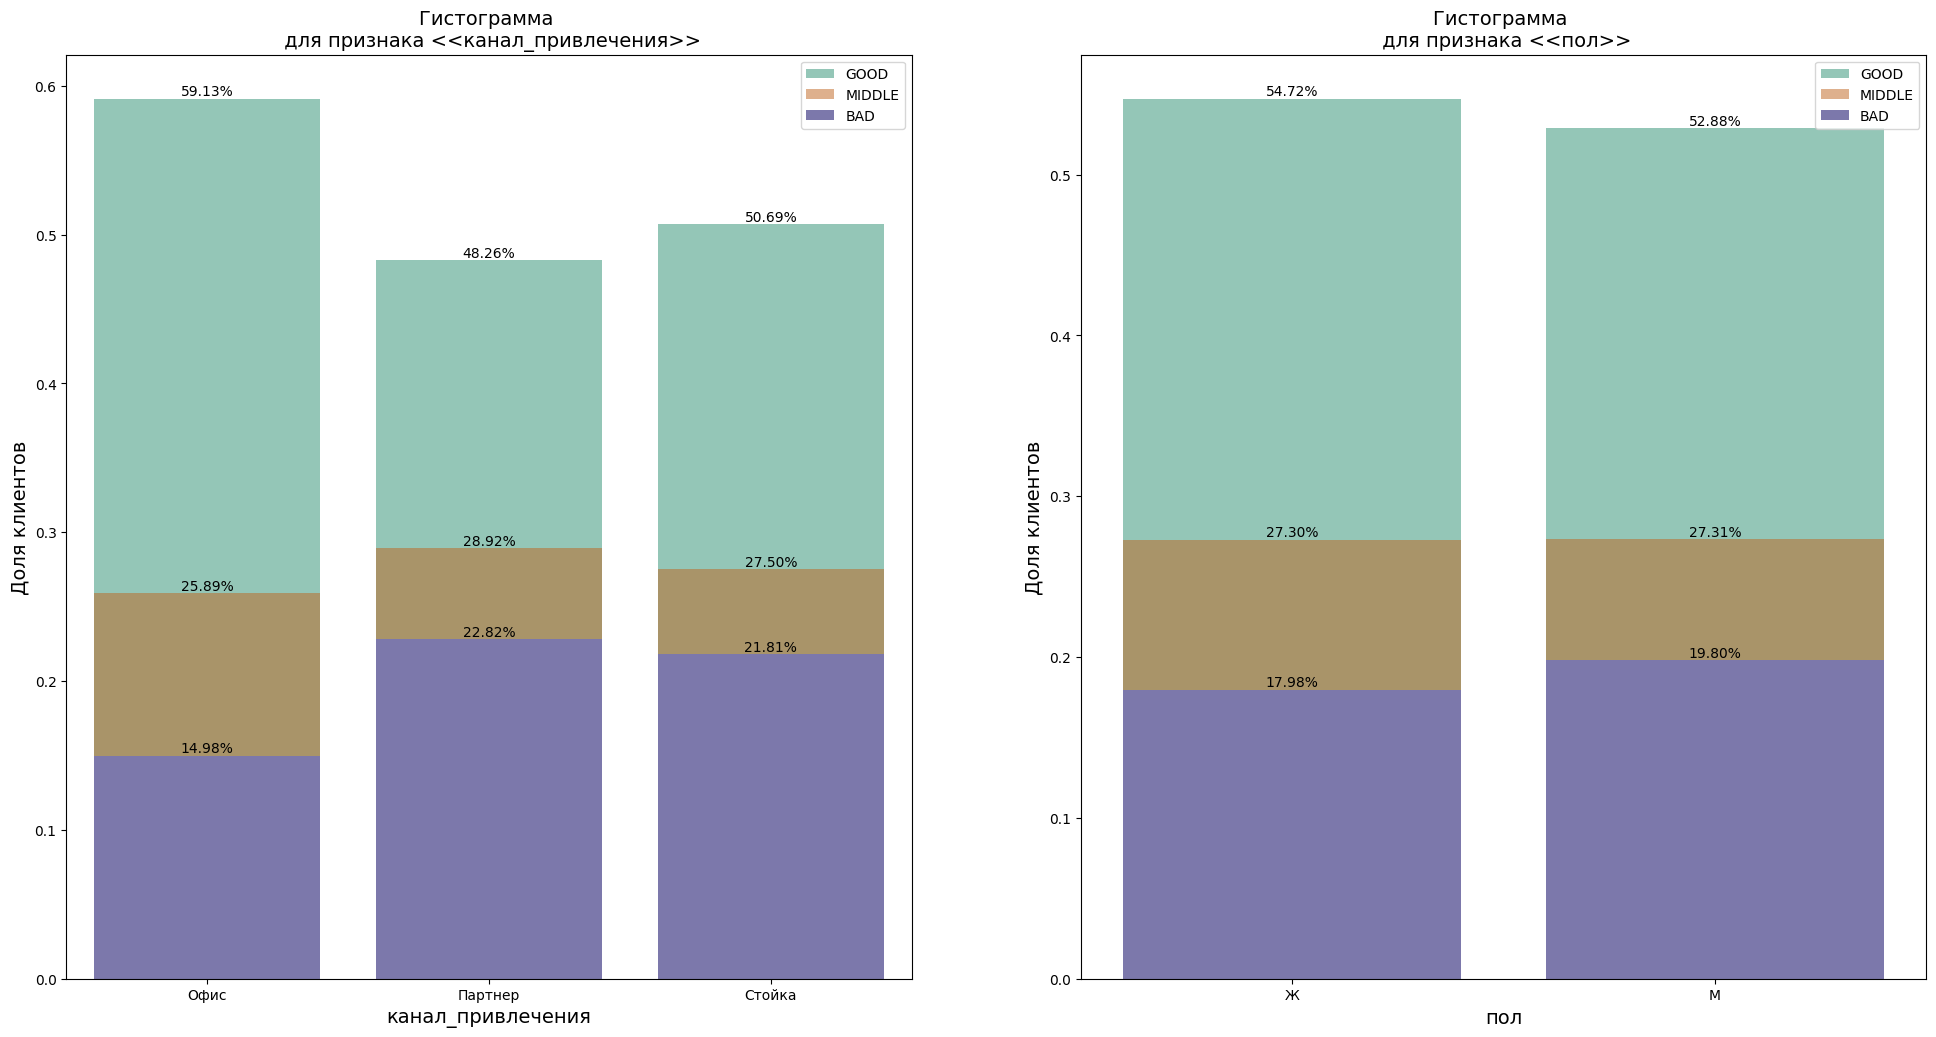

In [ ]:
fig, axes = plt.subplots(3, figsize=(24,12))
i=0
for i, col in enumerate(cat_vars):
    plt.subplot(1,2,i+1)
    data_all = df_abnormal[col].value_counts()
    r = (pd.DataFrame([df_abnormal[df_abnormal.дисциплина_клиентов == 'GOOD'][col].value_counts()/data_all,
            df_abnormal[df_abnormal.дисциплина_клиентов == 'MIDDLE'][col].value_counts()/data_all,
            df_abnormal[df_abnormal.дисциплина_клиентов == 'BAD'][col].value_counts()/data_all]).T)
    r.columns = ['2', '1', '0']
    ax1 = sns.barplot(x = r.index, y = r['2'], data = r, color='#1b9e77',
                      alpha = 0.5, label = 'GOOD')
    ax2 = sns.barplot(x = r.index, y = r['1'], data = r, color='#d95f02',
                      alpha = 0.5, label = 'MIDDLE')
    ax3 = sns.barplot(x = r.index, y = r['0'], data = r, color='#7570b3',
                      alpha = 1, label = 'BAD')
    plt.title("Гистограмма \n для признака <<{}>>".format(dict_cat_plot[col]), fontsize = 14)
    plt.xlabel(dict_cat_plot[col], fontsize = 14)
    plt.ylabel('Доля клиентов', fontsize = 14)
    plt.legend()
    for p in ax1.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax1.annotate('{:.2f}%'.format(100*y),
            (x.mean(), y),ha='center', va='bottom', fontsize = 10)


Видим существенное отличие по каналам привлечения клиентов. Можно предположить, что хорошие клиенты чаще приходят через офис, а плохие клиенты через остальные каналы.

Вывод:
- по количеству переводов проверить гипотезу плохие/хорошие
- по максимальной сумме проверить гипотезу плохие / средних
- сумма перевода проверить гипотезу плохие / средних

In [ ]:
# рассчитаем доли по признаку
columns = ['канал_привлечения', 'оператор_связи',
           'пол', 'тип_переводов',
           'география_переводов']

for col in columns:
    df_pt_canal = pd.pivot_table(data = df_abnormal,
                                 index = 'дисциплина_клиентов',
                                 columns = col,
                                 values = 'идентификатор',
                                 aggfunc = 'count')

    # нормирование показателей
    print(f'---{col}---')
    print(np.round(df_pt_canal / df_pt_canal.sum() * 100,2))
    print()

---канал_привлечения---
канал_привлечения    Офис  Партнер  Стойка
дисциплина_клиентов                       
BAD                 14.98    22.82   21.81
GOOD                59.13    48.26   50.69
MIDDLE              25.89    28.92   27.50

---оператор_связи---
оператор_связи       Белгородская Сотовая Связь  Волгоград-GSM  Вотек Мобайл  \
дисциплина_клиентов                                                            
BAD                                       23.26          20.44         23.00   
GOOD                                      37.21          54.01         49.27   
MIDDLE                                    39.53          25.55         27.73   

оператор_связи       Вымпел-Коммуникации  Дельта Телеком  ЕКАТЕРИНБУРГ-2000  \
дисциплина_клиентов                                                           
BAD                                18.37             NaN              25.34   
GOOD                               54.21           66.67              47.99   
MIDDLE                

In [ ]:
def float_to_str(x):
    return str(x)

In [ ]:
df_abnormal['тип_переводов'] = df_abnormal['тип_переводов'].apply(float_to_str)

In [ ]:
df_copy = df_abnormal.drop(columns=['идентификатор', 'дата_рождения']).copy()

In [ ]:
# коэффициенты корреляции
columns = ['география_переводов', 'пол', 'оператор_связи',
           'канал_привлечения', 'тип_переводов', 'дисциплина_клиентов']

for col in columns:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])

In [ ]:
df_copy.corr()

,дисциплина_клиентов,количество_переводов,тип_переводов,география_переводов,география_телефона,сумма_перевода,максимальная_сумма_перевода,средняя_сумма_перевода,канал_привлечения,оператор_связи,пол,возраст
дисциплина_клиентов,1.00,0.11,0.02,0.00,0.03,0.07,0.03,-0.06,-0.03,-0.01,-0.01,0.03
количество_переводов,0.11,1.00,-0.11,-0.05,0.02,0.48,0.13,-0.35,0.04,-0.02,-0.02,0.09
тип_переводов,0.02,-0.11,1.00,-0.06,-0.04,-0.04,0.00,0.05,-0.04,0.02,-0.07,0.07
география_переводов,0.00,-0.05,-0.06,1.00,0.80,0.00,0.04,0.09,-0.17,0.00,0.06,-0.05
география_телефона,0.03,0.02,-0.04,0.80,1.00,0.06,0.08,0.05,-0.22,0.02,0.06,-0.03
сумма_перевода,0.07,0.48,-0.04,0.00,0.06,1.00,0.78,0.31,0.01,-0.02,0.06,0.05
максимальная_сумма_перевода,0.03,0.13,0.00,0.04,0.08,0.78,1.00,0.56,-0.04,-0.02,0.06,0.05
средняя_сумма_перевода,-0.06,-0.35,0.05,0.09,0.05,0.31,0.56,1.00,-0.10,-0.01,0.06,-0.02
канал_привлечения,-0.03,0.04,-0.04,-0.17,-0.22,0.01,-0.04,-0.10,1.00,-0.00,-0.05,0.04
оператор_связи,-0.01,-0.02,0.02,0.00,0.02,-0.02,-0.02,-0.01,-0.00,1.00,-0.01,-0.02


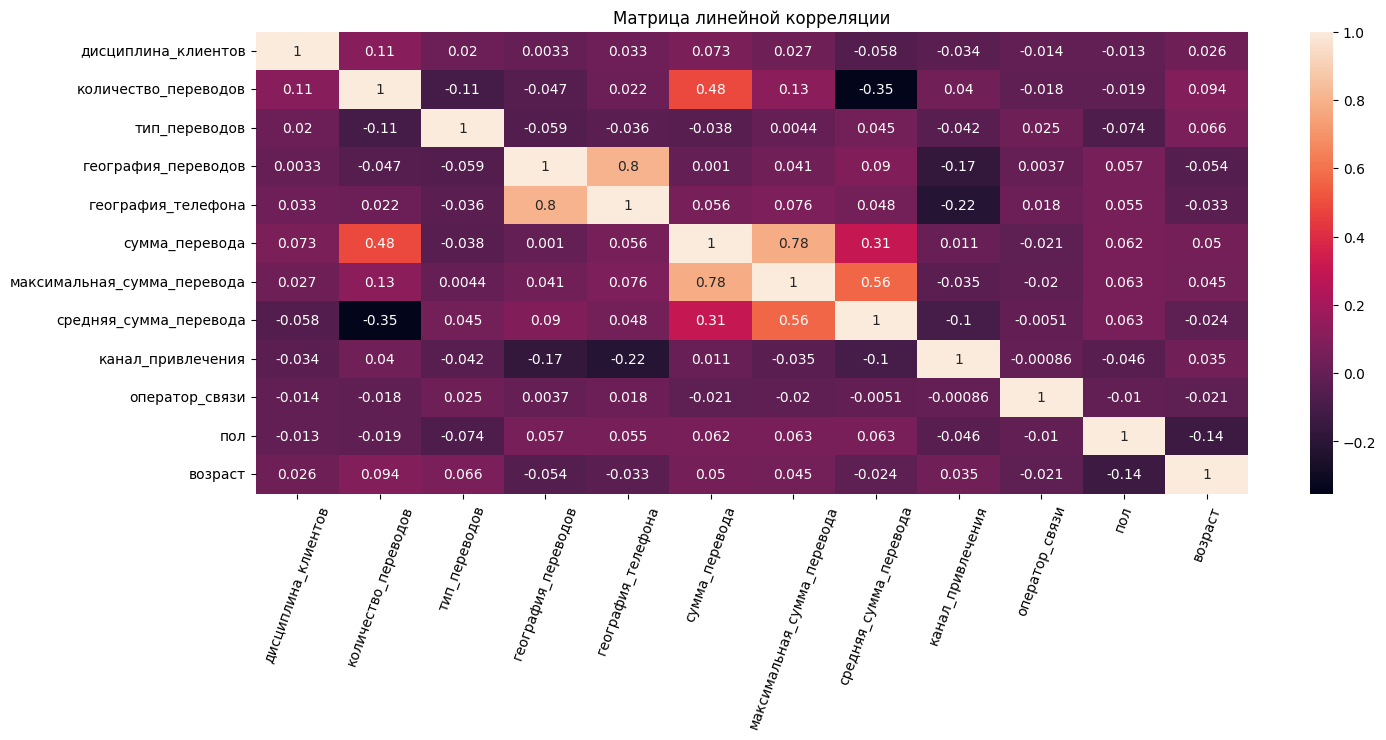

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(df_copy.corr(), annot = True)
plt.title ('Матрица линейной корреляции')
plt.xticks(rotation = 70)
plt.show()

Все абсолютные значения коэффициентов попарной корреляции, не превышают 0,3. Это свидетельствует о слабой линейной корреляции между признаками, в т.ч. в отношении целевого признака. Можно отметить некоторую линейную корреляцию между такими признаками как: возраст и дисциплина, канал привлечения и тип перевода, канал привлечения и география телефона, тип перевода и сумма перевода, количество переводов и сумма перевода.

## Проверка гипотез

Зададим $\alpha$ = 0.05
Сформулируем гипотезы:
Проряем гипотезу в отношении параметров -- медиана
- H_0: количество переводов клиентов с дисциплиной `BAD` не отличается от количества переводов клиентов с дисциплиной `GOOD`
- H_1: количество переводов клиентов с дисциплиной `BAD` меньше количества переводов клиентов с дисциплиной `GOOD`

In [ ]:
# формируем выбоки:
X = df_abnormal[df_abnormal['дисциплина_клиентов'] == 'BAD']['количество_переводов']
Y = df_abnormal[df_abnormal['дисциплина_клиентов'] == 'GOOD']['количество_переводов']

In [ ]:
## проверяем нормальность распределения
# Зададим  α  = 0.05
# H_0: выборка X подчиняется нормальному закону
# H_1: выборка X не подчиняется нормальному закону
from scipy.stats import kstest
print(
    kstest(X, 'norm',
       args=(X.mean(), X.std()))
    )

KstestResult(statistic=0.23694775918285188, pvalue=0.0, statistic_location=1.0, statistic_sign=-1)


Так как $p_\text{value} < α $, то гипотезу H_0 о нормальности распределений отвергаем.

In [ ]:
mannwhitneyu(X,Y, alternative = 'less')
# т.к. p_value = pvalue=4.23256174685435e-212 < alpha = 0.05, то гипотезу о равенстве отвергаем

MannwhitneyuResult(statistic=87974720.0, pvalue=4.23256174685435e-212)

In [ ]:
# применим H-критерий Краскела-Уоллиса для нескольких признаков
kruskal(X,Y)

KruskalResult(statistic=964.6987426007541, pvalue=8.464959295184091e-212)

Так как  pvalue<$\alpha$, при уровне значимости $\alpha$ = 0.05, то гипотезу H_0 о нормальности распределений отвергаем.

Сформулируем гипотезы в отношении признака - возраст:
- H_0: возраст клиентов с дисциплиной `BAD` не отличается от возраста клиентов с дисциплиной `GOOD`
- H_1: возраст клиентов с дисциплиной `BAD` меньше возраста клиентов с дисциплиной `GOOD`

In [ ]:
X = df_abnormal[df_abnormal['дисциплина_клиентов'] == 'BAD']['возраст']
Y = df_abnormal[df_abnormal['дисциплина_клиентов'] == 'GOOD']['возраст']

# проверяем нормальность распределения
from scipy.stats import kstest
print(
    kstest(X, 'norm',
       args=(X.mean(), X.std()))
    )

# т.к. p_value = 1.087352242941887e-46  < alpha = 0.05, то гипотезу о нормальном законе распределения X отвергаем


print(mannwhitneyu(X,Y, alternative = 'less'))


kruskal(X,Y)

KstestResult(statistic=0.07725342232476062, pvalue=1.253093248087625e-46, statistic_location=45, statistic_sign=1)
MannwhitneyuResult(statistic=89538935.0, pvalue=5.037837450542481e-186)


KruskalResult(statistic=844.7484604502087, pvalue=1.0075492261350837e-185)

Так как  pvalue < $\alpha$, при уровне значимости $\alpha$ = 0.05, то гипотезу H_0 отвергаем.

Сформулируем гипотезы в отношении признака - сумма переводов:
- H_0: сумма переводов клиентов с дисциплиной `BAD` не отличается от суммы переводов клиентов с дисциплиной `GOOD`
- H_1: сумма переводов клиентов с дисциплиной `BAD` меньше суммы переводов клиентов с дисциплиной `GOOD`

In [ ]:
X = df_abnormal[df_abnormal['дисциплина_клиентов'] == 'BAD']['сумма_перевода']
Y = df_abnormal[df_abnormal['дисциплина_клиентов'] == 'GOOD']['сумма_перевода']

# проверяем нормальность распределения
from scipy.stats import kstest
print(
    kstest(X, 'norm',
       args=(X.mean(), X.std()))
    )

# т.к. p_value = 8.669245387650092e-257 < alpha = 0.05, то гипотезу о нормальном законе распределения X отвергаем


print(mannwhitneyu(X,Y, alternative = 'less'))


kruskal(X,Y)


KstestResult(statistic=0.18144626719619647, pvalue=8.669245387650092e-257, statistic_location=30000.0, statistic_sign=-1)
MannwhitneyuResult(statistic=90301519.5, pvalue=4.238011141640798e-174)


KruskalResult(statistic=789.8991528787699, pvalue=8.475873748895573e-174)

Так как pvalue < α , при уровне значимости  α  = 0.05, то гипотезу H_0 отвергаем.

### Для биномиальных распределений

In [ ]:
df_abnormal.columns

Index(['идентификатор', 'дата_рождения', 'дисциплина_клиентов',
       'количество_переводов', 'тип_переводов', 'география_переводов',
       'география_телефона', 'сумма_перевода', 'максимальная_сумма_перевода',
       'средняя_сумма_перевода', 'канал_привлечения', 'оператор_связи', 'пол',
       'возраст'],
      dtype='object')

In [ ]:
df_pt_canal = pd.pivot_table(data = df_abnormal,
               index = 'дисциплина_клиентов',
               columns = 'канал_привлечения',
               values = 'идентификатор',
               aggfunc = 'count')
df_pt_canal

канал_привлечения,Офис,Партнер,Стойка
дисциплина_клиентов,,,
BAD,3478,4549,870
GOOD,13730,9620,2022
MIDDLE,6013,5764,1097


In [ ]:
np.round(df_pt_canal / df_pt_canal.sum() * 100,2)

канал_привлечения,Офис,Партнер,Стойка
дисциплина_клиентов,,,
BAD,14.98,22.82,21.81
GOOD,59.13,48.26,50.69
MIDDLE,25.89,28.92,27.50


Видим, что достаточно высокий процент клиентов с категорией "BAD" приходят через партнеров и через стойку.

In [ ]:
# для биноминальных распределений
n1 = df_abnormal[df_abnormal['канал_привлечения'] == 'Офис'].shape[0]
n2 = df_abnormal[df_abnormal['канал_привлечения'].isin(['Партнер', 'Стойка'])].shape[0]
m1 = df_abnormal[(df_abnormal['канал_привлечения'] == 'Офис')
                    & (df_abnormal['дисциплина_клиентов'] == 'BAD')].shape[0]

m2 = df_abnormal[(df_abnormal['канал_привлечения'].isin(['Партнер', 'Стойка']))
                       & (df_abnormal['дисциплина_клиентов'] == 'BAD')].shape[0]

def test_z_criterion(n1, n2, m1, m2, alpha=0.05):
    import scipy.stats as st
    import math
    z_value = (m1/n1 - m2/n2) / math.sqrt(((m1+m2)/(n1+n2))*(1-((m1+m2)/(n1+n2)))*(1/n1+1/n2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2 #1-F(z_value)
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях статистически значима.""")
    else: print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях статистически незначима.""")
    print('------------------------------------------------------------')

In [ ]:
test_z_criterion(n1, n2, m1, m2)

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях статистически значима.
------------------------------------------------------------


In [ ]:
n1 = df_abnormal[df_abnormal['канал_привлечения'] == 'Офис'].shape[0]
n2 = df_abnormal[df_abnormal['канал_привлечения'].isin(['Партнер', 'Стойка'])].shape[0]
m1 = df_abnormal[(df_abnormal['канал_привлечения'] == 'Офис')
                    & (df_abnormal['дисциплина_клиентов'] == 'GOOD')].shape[0]

m2 = df_abnormal[(df_abnormal['канал_привлечения'].isin(['Партнер', 'Стойка']))
                       & (df_abnormal['дисциплина_клиентов'] == 'GOOD')].shape[0]

def test_z_criterion(n1, n2, m1, m2, alpha=0.05):
    import scipy.stats as st
    import math
    z_value = (m1/n1 - m2/n2) / math.sqrt(((m1+m2)/(n1+n2))*(1-((m1+m2)/(n1+n2)))*(1/n1+1/n2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2 #1-F(z_value)
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях статистически значима.""")
    else: print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях статистически незначима.""")
    print('------------------------------------------------------------')

In [ ]:
test_z_criterion(n1, n2, m1, m2)

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях статистически значима.
------------------------------------------------------------


In [ ]:
# проверим гипотезу в разрезе признака "пол" и категории "BAD"
n1 = df_abnormal[df_abnormal['пол'] == 'Ж'].shape[0]
n2 = df_abnormal[df_abnormal['пол'] == 'М'].shape[0]
m1 = df_abnormal[(df_abnormal['пол'] == 'Ж')
                    & (df_abnormal['дисциплина_клиентов'] == 'BAD')].shape[0]

m2 = df_abnormal[(df_abnormal['пол'] == 'М')
                       & (df_abnormal['дисциплина_клиентов'] == 'BAD')].shape[0]

def test_z_criterion(n1, n2, m1, m2, alpha=0.05):
    import scipy.stats as st
    import math
    z_value = (m1/n1 - m2/n2) / math.sqrt(((m1+m2)/(n1+n2))*(1-((m1+m2)/(n1+n2)))*(1/n1+1/n2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2 #1-F(z_value)
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях статистически значима.""")
    else: print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях статистически незначима.""")
    print('------------------------------------------------------------')

In [ ]:
test_z_criterion(n1, n2, m1, m2)

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях статистически значима.
------------------------------------------------------------


In [ ]:
# проверим гипотезу в разрезе признака "пол" и категории "GOOD"
n1 = df_abnormal[df_abnormal['пол'] == 'Ж'].shape[0]
n2 = df_abnormal[df_abnormal['пол'] == 'М'].shape[0]
m1 = df_abnormal[(df_abnormal['пол'] == 'Ж')
                    & (df_abnormal['дисциплина_клиентов'] == 'GOOD')].shape[0]

m2 = df_abnormal[(df_abnormal['пол'] == 'М')
                       & (df_abnormal['дисциплина_клиентов'] == 'GOOD')].shape[0]

def test_z_criterion(n1, n2, m1, m2, alpha=0.05):
    import scipy.stats as st
    import math
    z_value = (m1/n1 - m2/n2) / math.sqrt(((m1+m2)/(n1+n2))*(1-((m1+m2)/(n1+n2)))*(1/n1+1/n2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2 #1-F(z_value)
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях статистически значима.""")
    else: print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях статистически незначима.""")
    print('------------------------------------------------------------')

In [ ]:
test_z_criterion(n1, n2, m1, m2)

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях статистически значима.
------------------------------------------------------------


## **Вывод:**
- Портрет клиента "GOOD": С большей долей вероятности, можно утверждать, что если клиент в среднем возрасте 54 года и старше, который пришел через офис, совершающий более 9 переводов, попадет в категорию GOOD.
- Портрет клиентa "BAD": С большей долей вероятности, можно утверждать, что если клиент среднего возраста 49 лет и младше, который пришел через другие каналы привлечения (Партнер + стойка), совершающий в среднем 6 переводов и меньше, попадет в категорию BAD.